**Librairie Nécessaire**

In [144]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

**Importer le CSV**

In [145]:
df= pd.read_csv('cardio_train.csv')

**Visalisation des données**

In [146]:
df.head()

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0


In [147]:
df = pd.read_csv("cardio_train.csv", sep=";")
df.to_csv("cardio_train_clean.csv", sep=",", index=False)

In [148]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**Nettoyer les données**

**Détécter les données manquantes**

In [149]:
print(df.isnull().sum())


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


**Détécter les données aberrantes** \
\
Isolation Forest est un algorithme de machine learning spécialisé dans la détection d’anomalies. Il fonctionne en isolant les observations aberrantes via des arbres de décision.

In [150]:
iso_forest = IsolationForest(contamination=0.000001, random_state=42)  # 5% de contamination estimée

# Entraînement sur les données (sans variable cible)
df["anomaly"] = iso_forest.fit_predict(df.select_dtypes(include=[np.number]))  # Seulement les colonnes numériques

# Les valeurs aberrantes sont marquées par -1
outliers = df[df["anomaly"] == -1]

print("Nombre de valeurs aberrantes détectées :", len(outliers))

Nombre de valeurs aberrantes détectées : 1


**Supprimer les données aberrantes**

In [151]:
print("Taille après suppression :", df.shape)
df.drop(df[df["anomaly"] == -1].index, inplace=True)
print("Taille après suppression :", df.shape)

Taille après suppression : (70000, 14)
Taille après suppression : (69999, 14)


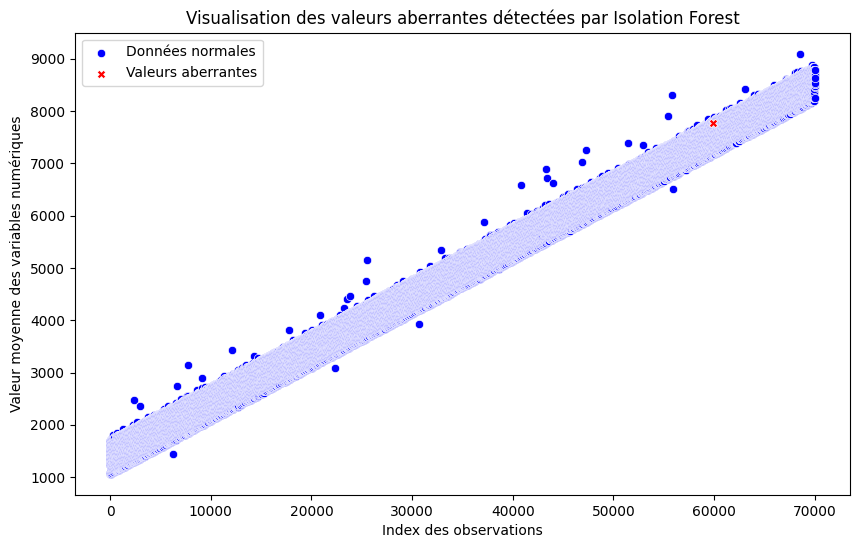

In [152]:
# Création du graphique
df.reset_index(drop=True, inplace=True)  # Remettre l’index à zéro sans conserver l'ancien

plt.figure(figsize=(10, 6))

# Tracer les données normales (anomaly = 1)
sns.scatterplot(data=df[df["anomaly"] != -1], x=df.index, y=df.select_dtypes(include=[np.number]).mean(axis=1), color="blue", label="Données normales")

# Tracer les valeurs aberrantes (anomaly = -1)
sns.scatterplot(data=outliers, x=outliers.index, y=outliers.select_dtypes(include=[np.number]).mean(axis=1), color="red", label="Valeurs aberrantes", marker="X")

plt.xlabel("Index des observations")
plt.ylabel("Valeur moyenne des variables numériques")
plt.title("Visualisation des valeurs aberrantes détectées par Isolation Forest")
plt.legend()
plt.show()